# Assignment 2

This assignment focuses on Lecture 2 and content from chapters 8-9. Refer to the Lecture 2 Jupyter notebook. In that notebook, we explored fuel efficiency of various cars. Here, the goal will be to go through a similar workflow using a breast cancer dataset. The data is comprised of features/characteristics measured from expert image analysis. Each sample is labeled as benign or cancerous. We assume there is a mapping between the features and this label, enabling breast cancer diagnosis. In a later lecture, we will use this same dataset and show how to improve the diagnosis using supervised learning. For now, the objective is to (1) understand and apply unsupervised methods, important when there is limited data and/or understanding trends, and (2) data preparation, which is important for both unsupervised and supervised learning. 

In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
bc_data_obj = load_breast_cancer(return_X_y=False)

In [2]:
#bc_data_obj.DESCR.split("\n")

## Examine Data (1 Point)

In [3]:
bc_data_obj.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

### Make Datasets

In [4]:
def cancer_df():
    df = pd.DataFrame(data=bc_data_obj['data'], columns=bc_data_obj['feature_names'])
    df['target'] = bc_data_obj['target']
    
    return df

cancer_df()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [5]:
cancer = cancer_df()
cancer.head()
len(cancer['target'])

569

In [6]:
cancer['target'].value_counts()

1    357
0    212
Name: target, dtype: int64

In [7]:

def feature_target():
    cancerdf = cancer_df()
    
    X= cancerdf.iloc[:, :-1]
    y= cancerdf['target']
    
    return X, y 
 
from sklearn.model_selection import train_test_split

def split_model():
    X, y = feature_target()
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2 , random_state=42)
    
    return X_train, X_test, y_train, y_test


 # X_train, X_test, y_train, y_test ...

X_train, X_test, y_train, y_test = split_model()

After this cell, use X_train. Later on, X_test and y_test will be used to evaluate the diagnostic success of the unsupervised learning approaches. You will find as the course progresses that training with the labels is going to give better results. Keep track of any transformations to the training data and always use the fitted train object to transform the X_test data. 

## Process Data (5 points Total)

### Check for Outliers

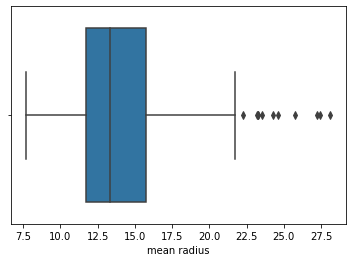

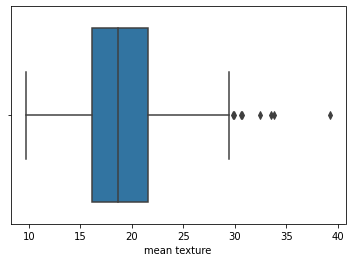

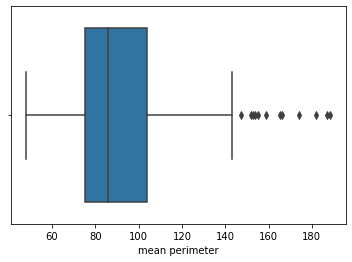

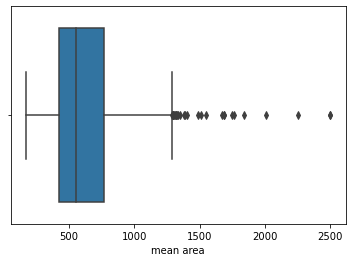

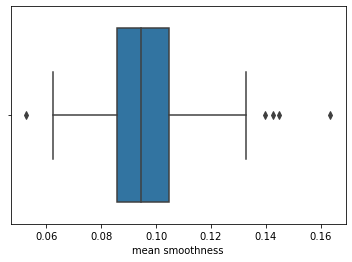

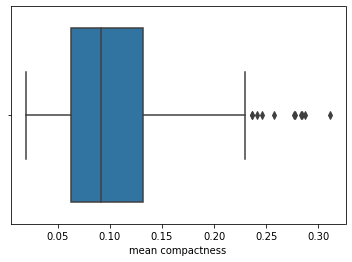

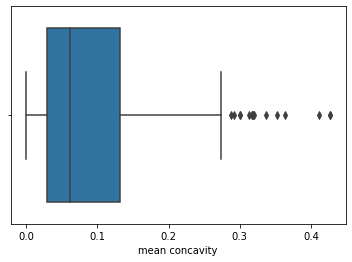

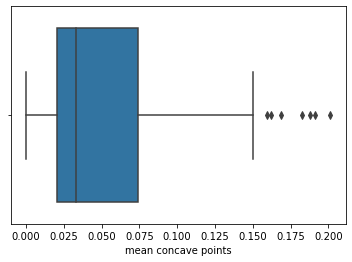

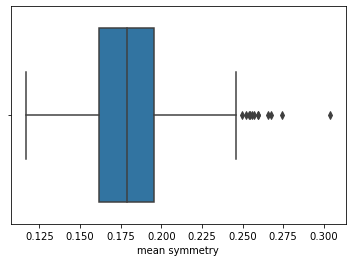

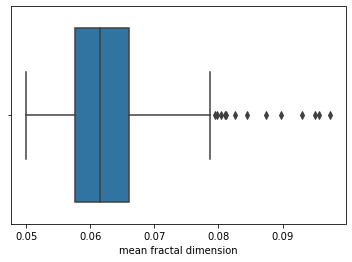

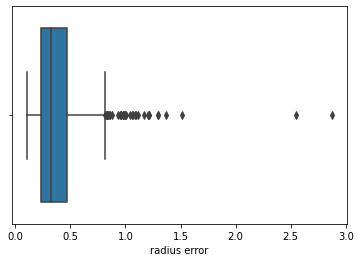

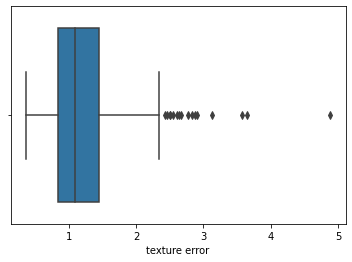

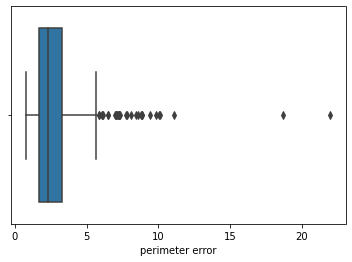

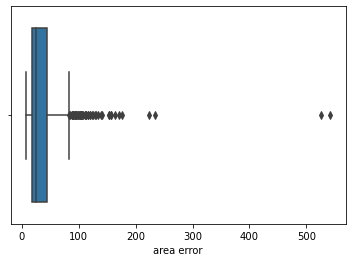

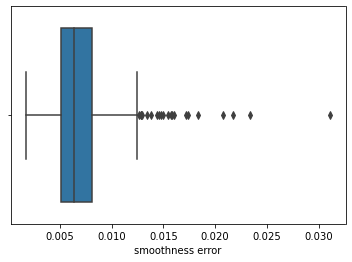

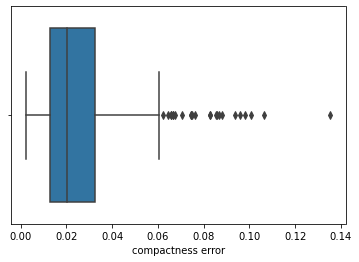

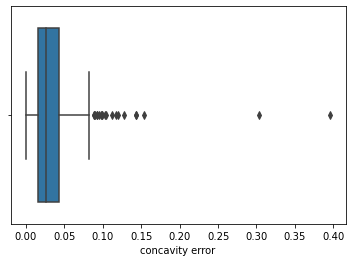

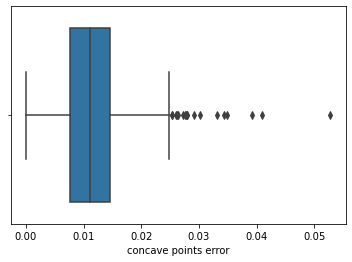

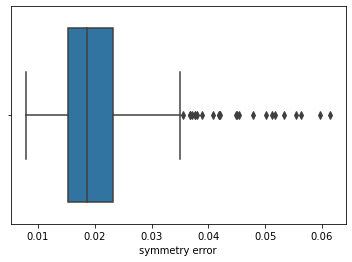

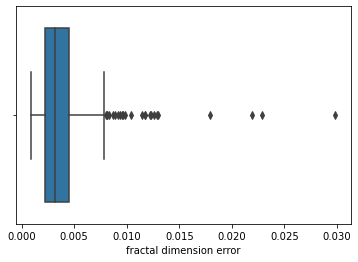

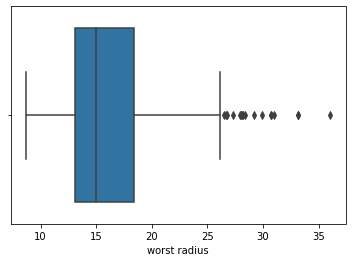

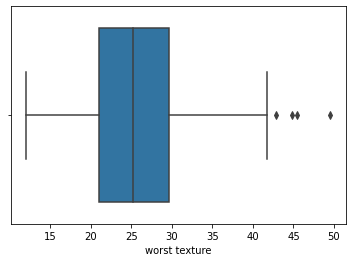

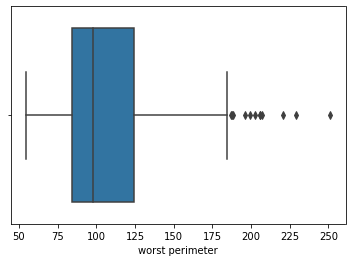

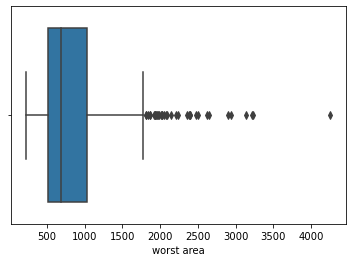

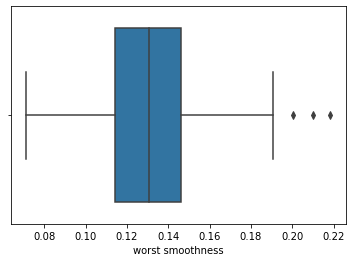

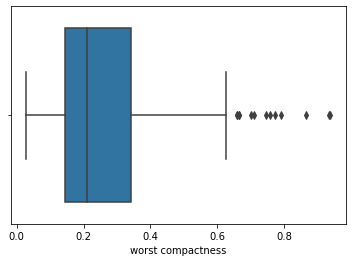

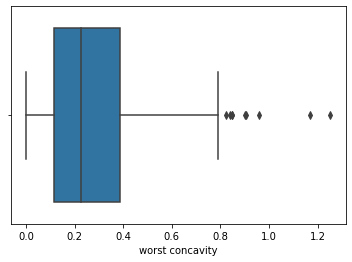

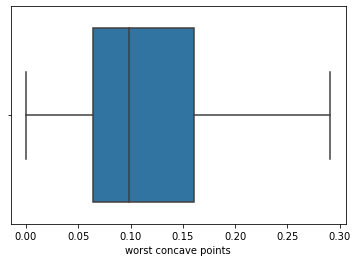

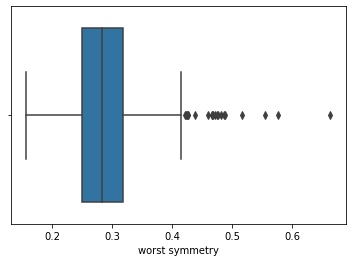

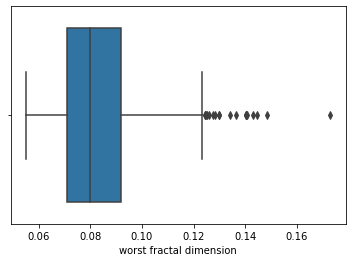

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

num_cols = list(X_train.select_dtypes(np.number).columns)
for col in num_cols:
    sns.boxplot(x = col, data=X_train)
    plt.show()

In [9]:
#Using Z-scores to check for outliers
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(X_train))
print(z)

     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
68      1.440753      0.435319        1.362085   1.139118         0.780573   
181     1.974096      1.733026        2.091672   1.851973         1.319843   
63      1.399982      1.249622        1.345209   1.109785         1.332645   
248     0.981797      1.416222        0.982587   0.866944         0.059390   
60      1.117700      1.010259        1.125002   0.965942         1.269511   
..           ...           ...             ...        ...              ...   
71      1.480675      1.066580        1.362085   1.157451         0.149987   
106     0.701497      0.200650        0.687880   0.682204         1.327033   
270     0.048802      0.555001        0.065125   0.061423         2.261627   
435     0.038969      0.102073        0.031374   0.154780         0.737432   
102     0.548606      0.313276        0.603502   0.551900         1.122689   

     mean compactness  mean concavity  mean concave points  mea

In [10]:
threshold = 3
print(np.where(z > 3))

(array([  0,   0,   0,   0,   1,   1,   4,   6,   6,  16,  17,  17,  17,
        41,  41,  41,  41,  41,  41,  43,  46,  54,  54,  84,  88,  88,
        88, 100, 118, 122, 122, 122, 122, 122, 122, 122, 125, 131, 141,
       141, 141, 141, 141, 141, 141, 141, 163, 163, 163, 163, 163, 163,
       164, 173, 173, 179, 201, 202, 202, 202, 206, 206, 206, 206, 206,
       206, 206, 206, 208, 208, 208, 211, 211, 218, 218, 218, 218, 218,
       218, 218, 218, 218, 218, 218, 218, 218, 218, 220, 221, 226, 226,
       226, 234, 234, 247, 247, 250, 252, 252, 253, 263, 263, 263, 264,
       268, 268, 268, 274, 277, 277, 280, 292, 292, 292, 292, 292, 293,
       306, 327, 327, 327, 327, 327, 337, 337, 347, 347, 352, 352, 362,
       362, 365, 365, 365, 374, 374, 376, 376, 376, 376, 376, 376, 376,
       381, 381, 381, 381, 381, 381, 381, 381, 381, 381, 381, 394, 394,
       394, 394, 394, 397, 397, 398, 398, 399, 399, 410, 410, 410, 411,
       421, 421, 450, 450, 450, 450], dtype=int64), array([15, 

In [11]:
X_train_sub = X_train[(z < 3).all(axis=1)]

In [12]:
X_train.shape

(455, 30)

In [13]:
X_train_sub.shape

(393, 30)

#### Corrections?

In [14]:
#We can see that by removing extreme outliers we lose around 10% of our data. 
#Being medical data, I want to retian as much info as possible so I will choose to Windzorize the data

In [15]:
Xtrain = X_train

In [16]:
!pip install -U feature-engine
from feature_engine.outliers import Winsorizer
winsorizer = Winsorizer(tail='both')

winsorizer.fit_transform(Xtrain)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
68,9.029,17.33,58.79,250.5,0.10660,0.141300,0.31300,0.04375,0.211100,0.080460,...,10.310,22.65,65.50,324.7,0.14820,0.436500,0.902789,0.17500,0.4228,0.11750
181,21.090,26.57,142.70,1311.0,0.11410,0.261031,0.24870,0.14960,0.239500,0.073980,...,26.680,33.48,176.50,2089.0,0.14910,0.717785,0.678000,0.29030,0.4098,0.12840
63,9.173,13.86,59.20,260.9,0.07721,0.087510,0.05988,0.02180,0.234100,0.069630,...,10.010,19.23,65.59,310.1,0.09836,0.167800,0.139700,0.05087,0.3282,0.08490
248,10.650,25.22,68.01,347.0,0.09657,0.072340,0.02379,0.01615,0.189700,0.063290,...,12.250,35.19,77.98,455.7,0.14990,0.139800,0.112500,0.06136,0.3409,0.08147
60,10.170,14.88,64.55,311.9,0.11340,0.080610,0.01084,0.01290,0.263561,0.069600,...,11.020,17.45,69.86,368.6,0.12750,0.098660,0.021680,0.02579,0.3557,0.08020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,8.888,14.64,58.79,244.0,0.09783,0.153100,0.08606,0.02872,0.190200,0.084386,...,9.733,15.67,62.56,284.4,0.12070,0.243600,0.143400,0.04786,0.2254,0.10840
106,11.640,18.33,75.17,412.5,0.11420,0.101700,0.07070,0.03485,0.180100,0.065200,...,13.140,29.26,85.51,521.7,0.16880,0.266000,0.287300,0.12180,0.2806,0.09097
270,14.290,16.82,90.30,632.6,0.06429,0.026750,0.00725,0.00625,0.150800,0.053760,...,14.910,20.65,94.44,684.6,0.08567,0.050360,0.038660,0.03333,0.2458,0.06120
435,13.980,19.62,91.12,599.5,0.10600,0.113300,0.11260,0.06463,0.166900,0.065440,...,17.040,30.80,113.90,869.3,0.16130,0.356800,0.406900,0.18270,0.3179,0.10550


In [17]:
Xtrain.shape

(455, 30)

### Check Distributions

mean radius
Skew : 0.98


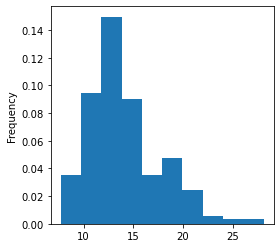

mean texture
Skew : 0.76


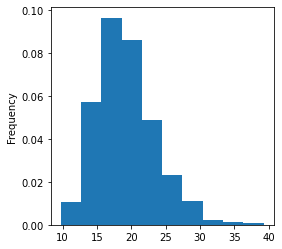

mean perimeter
Skew : 1.02


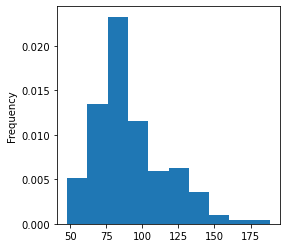

mean area
Skew : 1.73


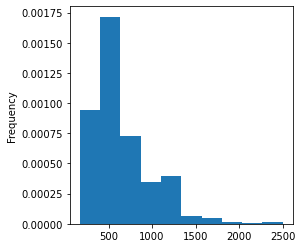

mean smoothness
Skew : 0.51


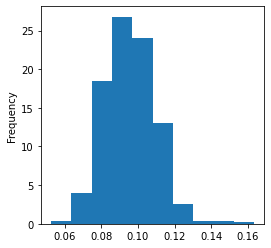

mean compactness
Skew : 1.09


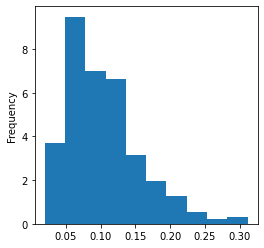

mean concavity
Skew : 1.4


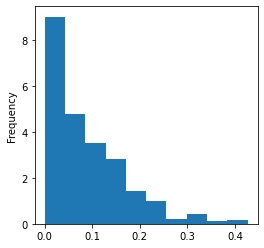

mean concave points
Skew : 1.18


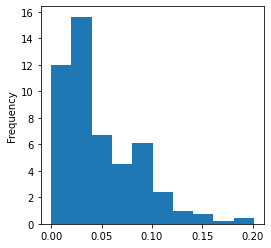

mean symmetry
Skew : 0.74


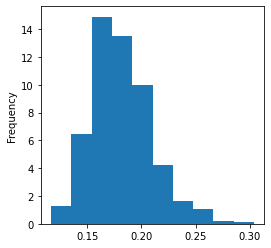

mean fractal dimension
Skew : 1.4


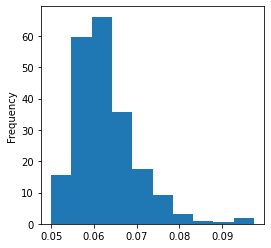

radius error
Skew : 3.4


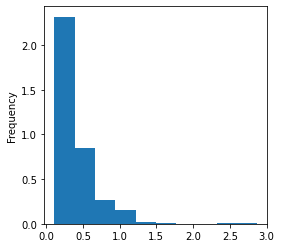

texture error
Skew : 1.73


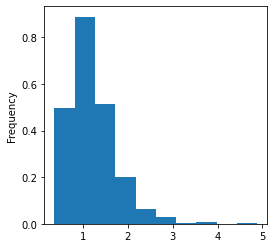

perimeter error
Skew : 3.76


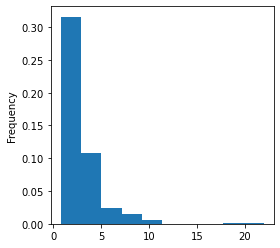

area error
Skew : 5.85


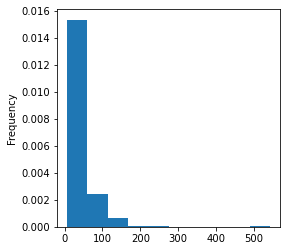

smoothness error
Skew : 2.57


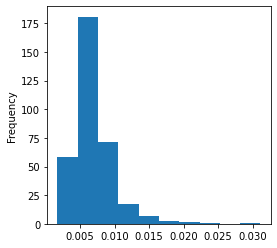

compactness error
Skew : 1.96


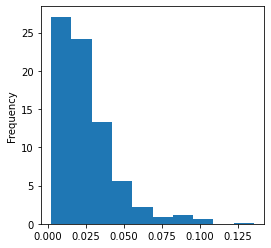

concavity error
Skew : 5.17


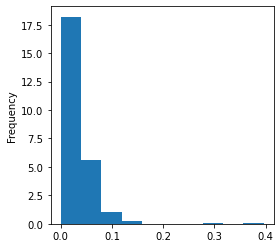

concave points error
Skew : 1.61


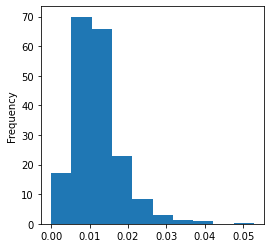

symmetry error
Skew : 1.93


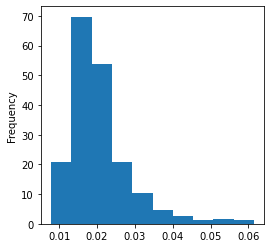

fractal dimension error
Skew : 4.05


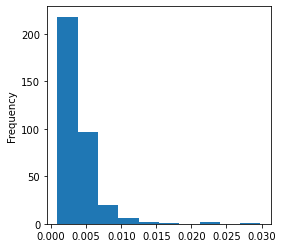

worst radius
Skew : 1.12


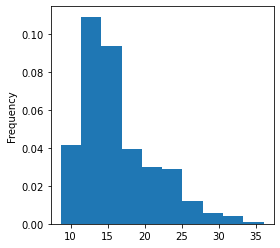

worst texture
Skew : 0.49


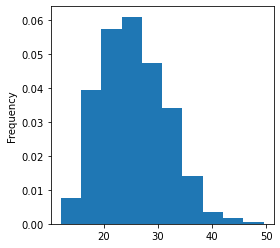

worst perimeter
Skew : 1.13


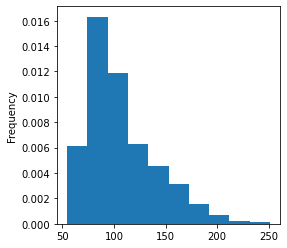

worst area
Skew : 1.91


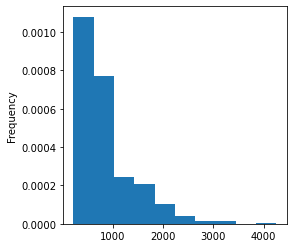

worst smoothness
Skew : 0.39


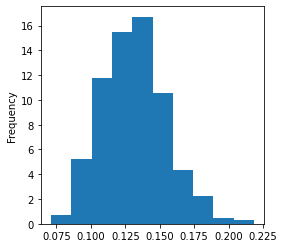

worst compactness
Skew : 1.34


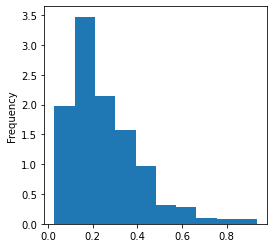

worst concavity
Skew : 1.11


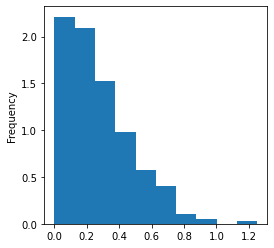

worst concave points
Skew : 0.51


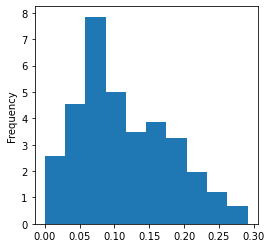

worst symmetry
Skew : 1.48


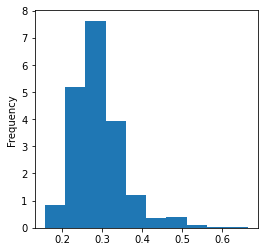

worst fractal dimension
Skew : 1.31


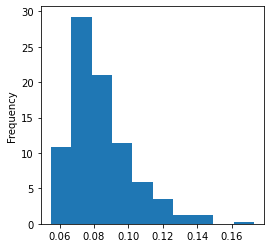

In [19]:
import matplotlib.pyplot as plt
num_cols = list(X_train.select_dtypes(np.number).columns)

for col in num_cols:
    print(col)
    print('Skew :',round(X_train[col].skew(),2))
    plt.figure(figsize = (4,4))
    X_train[col].plot.hist(xlabel = col, density = True)
    plt.show()

In [20]:
#We can see from our histograms showing skew that we have a good number of features that are highly skewed. I believe normaization
#is needed 

### Check for Non-linearity (plot or plots)

Depending on what your downstream analysis will be, checking for non-linearities is important. For example, PCA is a linear dimensionality reduction technique. Therefore, it does not retain non-linear relationships, which could be informative in a downstream analysis using the PCs. Simplification, in this case, can be a good thing, since complex, non-linear relationships may simply go away with additional data.

In [21]:
#This was code for a scatterplot of each feature with the Pearson R that I was trying to use
#This code takes a very long time to run so it is not very effient. I will use a heatmap to check linearity instead. 

# code here
# from scipy.stats import pearsonr
# def corrfunc(x, y, **kws):
#     (r, p) = pearsonr(x, y)
#     ax = plt.gca()
#     ax.annotate("r = {:.2f} ".format(r),
#                 xy=(.1, .9), xycoords=ax.transAxes)
#     ax.annotate("p = {:.3f}".format(p),
#                 xy=(.4, .9), xycoords=ax.transAxes)
# sns.pairplot(Xtrain[num_cols])
# graph = sns.pairplot(Xtrain)
# graph.map(corrfunc)

<AxesSubplot:>

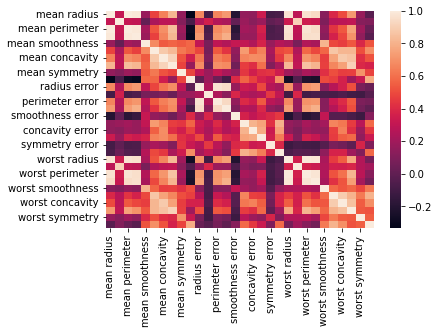

In [22]:
sns.heatmap(Xtrain.corr())

Explain findings here: From what our heatmap tells us, we can see that there are intense areas of high positive and negative corrlation. However, we do see these reds/light purples where our correlation is low/nonexistant showing we do have nonlinear features. Each plot looks like there is some natural variability unlike what we saw with a feature like "cylnders" in the cars dataset.

### Check for High Correlations and Drop Redundancies (e.g. x >= R=.85))

In [23]:
cor_matrix = Xtrain.corr().abs()
print(cor_matrix)

                         mean radius  mean texture  mean perimeter  mean area  \
mean radius                 1.000000      0.306881        0.997850   0.986609   
mean texture                0.306881      1.000000        0.313124   0.300314   
mean perimeter              0.997850      0.313124        1.000000   0.985985   
mean area                   0.986609      0.300314        0.985985   1.000000   
mean smoothness             0.173051      0.009475        0.210092   0.180709   
mean compactness            0.477986      0.229954        0.529721   0.471296   
mean concavity              0.647311      0.282160        0.688251   0.659793   
mean concave points         0.812377      0.286231        0.842081   0.814273   
mean symmetry               0.150386      0.108045        0.185885   0.152679   
mean fractal dimension      0.335575      0.079010        0.286307   0.305321   
radius error                0.666954      0.249347        0.680739   0.722728   
texture error               

In [24]:

from feature_engine.selection import DropCorrelatedFeatures

rm_high_corrs = DropCorrelatedFeatures(variables=None, method='pearson', threshold=0.85)
X_train_corr = rm_high_corrs.fit_transform(Xtrain)
X_train_corr

,mean radius,mean texture,mean smoothness,mean compactness,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst smoothness,worst concavity,worst symmetry,worst fractal dimension
68,9.029,17.33,0.10660,0.14130,0.04375,0.2111,0.08046,0.3274,1.1940,0.009549,0.086060,0.303800,0.033220,0.04197,0.009559,0.14820,1.25200,0.4228,0.11750
181,21.090,26.57,0.11410,0.28320,0.14960,0.2395,0.07398,0.6298,0.7629,0.004253,0.047590,0.038720,0.015670,0.01798,0.005295,0.14910,0.67800,0.4098,0.12840
63,9.173,13.86,0.07721,0.08751,0.02180,0.2341,0.06963,0.4098,2.2650,0.008738,0.039380,0.043120,0.015600,0.04192,0.005822,0.09836,0.13970,0.3282,0.08490
248,10.650,25.22,0.09657,0.07234,0.01615,0.1897,0.06329,0.2497,1.4930,0.007189,0.010350,0.010810,0.006245,0.02158,0.002619,0.14990,0.11250,0.3409,0.08147
60,10.170,14.88,0.11340,0.08061,0.01290,0.2743,0.06960,0.5158,1.4410,0.007514,0.010990,0.007665,0.008193,0.04183,0.005953,0.12750,0.02168,0.3557,0.08020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,8.888,14.64,0.09783,0.15310,0.02872,0.1902,0.08980,0.5262,0.8522,0.017210,0.093680,0.056710,0.017660,0.02541,0.021930,0.12070,0.14340,0.2254,0.10840
106,11.640,18.33,0.11420,0.10170,0.03485,0.1801,0.06520,0.3060,1.6570,0.008540,0.023100,0.029450,0.013980,0.01565,0.003840,0.16880,0.28730,0.2806,0.09097
270,14.290,16.82,0.06429,0.02675,0.00625,0.1508,0.05376,0.1302,0.7198,0.003492,0.003710,0.004826,0.003608,0.01536,0.001381,0.08567,0.03866,0.2458,0.06120
435,13.980,19.62,0.10600,0.11330,0.06463,0.1669,0.06544,0.2208,0.9533,0.005314,0.017910,0.021850,0.009567,0.01223,0.002846,0.16130,0.40690,0.3179,0.10550


In [70]:
X_test_corr = rm_high_corrs.transform(X_test)
X_test_data = power.transform(X_test_corr)
X_test_final = pd.DataFrame(X_test_data, columns = X_test_corr.columns)
X_test_final

,mean radius,mean texture,mean smoothness,mean compactness,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst smoothness,worst concavity,worst symmetry,worst fractal dimension
0,-0.352682,-0.027426,0.347392,0.266041,-0.049265,0.522273,0.338561,0.380928,-0.130577,0.239457,-0.183002,0.019206,-0.116093,-0.182085,0.219021,0.535640,0.196249,0.346946,0.445384
1,1.325030,0.594564,-0.357036,0.205255,1.033710,-0.840603,-1.403172,1.560013,-0.786649,-1.082702,-0.421670,-0.228904,0.475389,-1.044646,-1.264724,-0.490526,0.204691,-0.519551,-1.231140
2,0.556255,0.184433,0.988884,0.584876,1.059468,0.542905,-0.663055,0.737278,-0.821714,-0.080378,-0.588927,0.079713,-0.009060,-1.017216,-0.571200,1.014021,0.718882,0.040338,-0.022114
3,-0.377865,-0.260428,0.740682,0.746053,-0.435944,0.110736,1.234801,-1.323960,0.693232,1.240836,0.774540,0.957867,0.127512,0.479630,1.277995,0.633892,0.050020,-0.509013,0.774123
4,-0.705780,-1.194986,0.360740,0.391083,-0.520924,0.137112,0.883581,-0.366284,1.151741,1.691570,1.153093,1.175785,0.669940,-0.075132,1.115216,0.194110,-0.317662,-1.017277,0.057290
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,0.335312,-0.481758,-0.646191,-0.688149,-0.439211,-1.688341,-1.666436,-0.867164,-0.221798,-1.720705,-0.683884,-0.526940,-1.037197,-1.391358,-1.780785,-0.733842,0.069090,-0.727473,-1.224078
110,0.709321,0.224203,-0.235285,-0.224142,0.757247,0.061354,-1.575340,1.488197,-0.197479,1.432478,0.060541,0.419572,1.109693,-0.657403,-1.021251,0.834407,0.278248,-0.316053,-1.440527
111,-0.713840,-1.040460,0.462494,-0.381779,-0.383400,0.375033,0.017419,-0.545454,-0.144768,0.113621,-0.864296,-0.329567,-0.176749,-0.387416,-0.318771,0.381558,-0.313093,-0.288133,-0.173235
112,0.214690,1.805130,-0.987541,0.226386,0.147528,-2.051026,-0.047748,0.033507,1.775018,-0.048632,0.513750,0.573784,-0.166897,-1.586178,0.220818,-1.034379,0.394814,-2.199622,-0.182859


### Correct  Skew? Explain Why or Why Not

In [25]:
#I want to check if there are any negative values 
X_train_corr[(X_train_corr < 0).all(1)]

,mean radius,mean texture,mean smoothness,mean compactness,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst smoothness,worst concavity,worst symmetry,worst fractal dimension


In [26]:
from sklearn.preprocessing import PowerTransformer
power = PowerTransformer(method = 'yeo-johnson')
X_train_data = power.fit_transform(X_train_corr)

In [27]:
X_train_data

array([[-1.91653472, -0.35241146,  0.8200437 , ...,  2.50445446,
         1.84987033,  1.67402545],
       [ 1.69908771,  1.5937314 ,  1.29585775, ...,  1.64222048,
         1.72819268,  1.93806471],
       [-1.83410726, -1.38503518, -1.41648987, ..., -0.59272383,
         0.76101421,  0.28892012],
       ...,
       [ 0.23516744, -0.4899686 , -2.6238211 , ..., -1.43255292,
        -0.72081091, -1.73457274],
       [ 0.14329954,  0.21721057,  0.78047732, ...,  0.82988064,
         0.60855374,  1.28868168],
       [-0.45842743,  0.42223724, -1.16440188, ..., -0.78122935,
        -0.22899838, -0.94987786]])

In [28]:
X_train_final = pd.DataFrame(X_train_data, columns = X_train_corr.columns)
X_train_final

,mean radius,mean texture,mean smoothness,mean compactness,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst smoothness,worst concavity,worst symmetry,worst fractal dimension
0,-1.916535,-0.352411,0.820044,0.901411,0.136915,1.118094,1.983966,-0.017888,0.200359,1.123419,2.056701,2.565466,2.440816,1.985442,1.978274,0.762864,2.504454,1.849870,1.674025
1,1.699088,1.593731,1.295858,2.210581,1.885634,1.874970,1.510829,1.234740,-0.892523,-1.208621,1.383987,0.583085,0.778561,-0.152135,1.036281,0.798725,1.642220,1.728193,1.938065
2,-1.834107,-1.385035,-1.416490,-0.143822,-0.700786,1.743645,1.089515,0.450050,1.718387,0.888110,1.081427,0.759919,0.768329,1.983744,1.220126,-1.536757,-0.592724,0.761014,0.288920
3,-1.086072,1.358717,0.127551,-0.536485,-0.965221,0.424666,0.272557,-0.600729,0.747452,0.337001,-1.089575,-1.049695,-1.012639,0.438363,-0.444916,0.830451,-0.796734,0.938374,0.066121
4,-1.311450,-1.055986,1.252881,-0.316012,-1.127971,2.602646,1.086260,0.893505,0.661388,0.465040,-1.013105,-1.306546,-0.564318,1.980673,1.261846,-0.113859,-1.598342,1.131296,-0.021413
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
450,-1.999134,-1.131270,0.218280,1.074422,-0.406312,0.442258,2.437032,0.929637,-0.626883,2.280373,2.113017,1.209776,1.053948,0.920097,2.390860,-0.424965,-0.566078,-1.199472,1.392528
451,-0.665790,-0.094536,1.301974,0.179660,-0.169913,0.072796,0.548204,-0.162640,0.998045,0.825533,0.143541,0.149109,0.520460,-0.624215,0.366049,1.540553,0.300554,-0.016340,0.638842
452,0.235167,-0.489969,-2.623821,-2.090191,-1.487341,-1.188348,-1.613082,-1.904386,-1.030009,-1.753425,-1.998300,-1.554744,-1.700038,-0.688704,-1.598574,-2.235559,-1.432553,-0.720811,-1.734573
453,0.143300,0.217211,0.780477,0.416479,0.716267,-0.458032,0.580903,-0.863326,-0.353832,-0.558613,-0.290797,-0.280000,-0.275325,-1.477686,-0.272833,1.267586,0.829881,0.608554,1.288682


Explain: Due to the skewing of my data when chekcing the distributions I decided to normalize the data. 
The Box Cox  transofrmation does not run indicating we do not only have postive values in our data. Since interpreting log transformations can be less intuitive I decided to run a Yeo Johnson power transrmation 

mean radius
Skew : 0.98


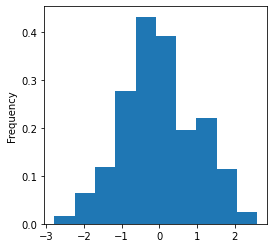

mean texture
Skew : 0.76


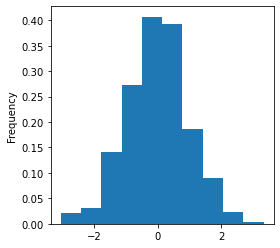

mean smoothness
Skew : 0.51


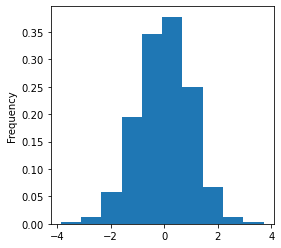

mean compactness
Skew : 1.09


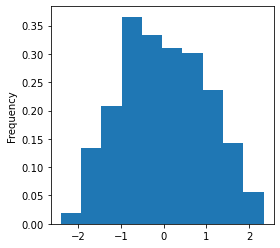

mean concave points
Skew : 1.18


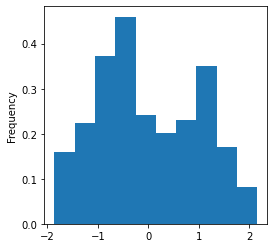

mean symmetry
Skew : 0.74


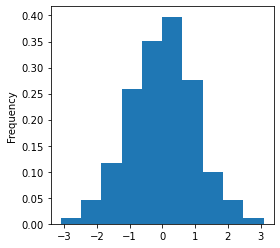

mean fractal dimension
Skew : 1.4


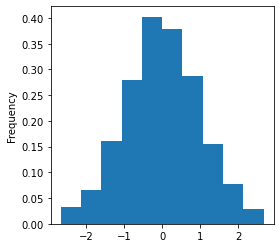

radius error
Skew : 3.4


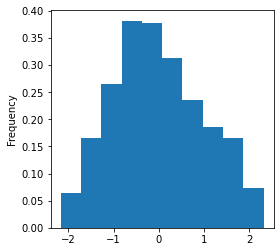

texture error
Skew : 1.73


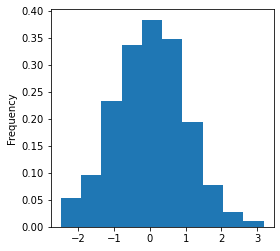

smoothness error
Skew : 2.57


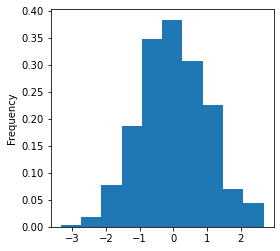

compactness error
Skew : 1.96


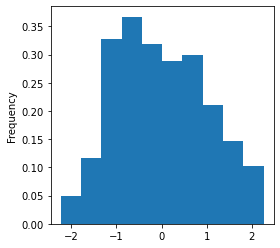

concavity error
Skew : 5.17


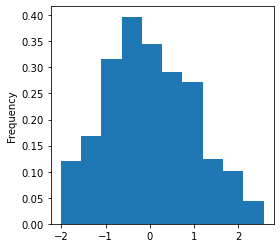

concave points error
Skew : 1.61


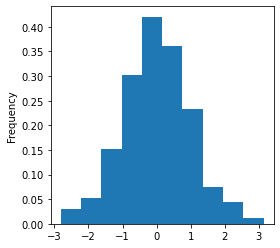

symmetry error
Skew : 1.93


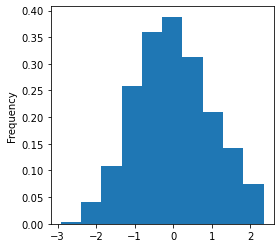

fractal dimension error
Skew : 4.05


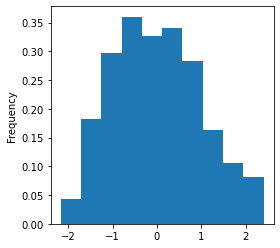

worst smoothness
Skew : 0.39


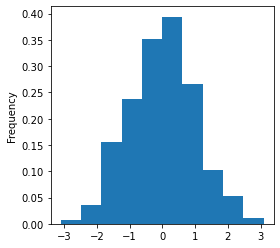

worst concavity
Skew : 1.11


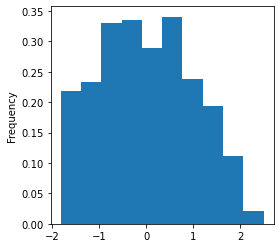

worst symmetry
Skew : 1.48


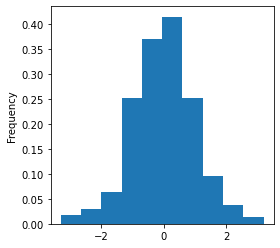

worst fractal dimension
Skew : 1.31


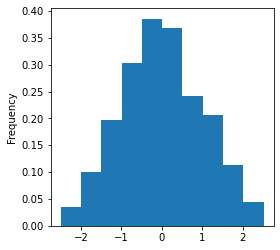

In [29]:
num_cols = list(X_train_final.select_dtypes(np.number).columns)

for col in num_cols:
    print(col)
    print('Skew :',round(X_train[col].skew(),2))
    plt.figure(figsize = (4,4))
    X_train_final[col].plot.hist(xlabel = col, density = True)
    plt.show()
    
#Looking at our data after transorming 

## PCA (2 Points


### Make a Plot Showing the Cummulative Explained Variance

In [30]:
from sklearn.decomposition import PCA

n=X_train_final[num_cols].shape[1]

pca = PCA(n_components=n, random_state=42)

xpca = pca.fit(X_train_final)


In [31]:
pca_var_explain = pd.DataFrame({'pc': [str(i) for i in range(1,n+1)], 'cum_var': pca.explained_variance_ratio_.cumsum()})

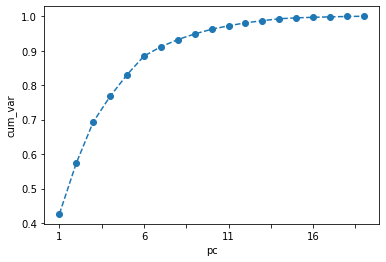

In [32]:
pca_var_explain.plot(kind = "line", x = "pc", 
                     y = "cum_var", 
                     legend = False, 
                     ylabel="cum_var", 
                     marker = 'o', 
                     linestyle = '--')
plt.show()

In [33]:
pca.explained_variance_ratio_

array([0.42643944, 0.14771394, 0.11898548, 0.07457614, 0.06262765,
       0.05408549, 0.02696335, 0.02084102, 0.01643681, 0.01355323,
       0.00998261, 0.00872156, 0.00616174, 0.00560038, 0.00265241,
       0.00155148, 0.00130179, 0.0010997 , 0.00070579])

### How Many PCs Would You Retain?

In [34]:
#I would like to retain as many PC's that explain 95% of the varience 
#I can do this by setting n_components to .95 which is the varience I want to preserve

pca_retain = PCA(n_components = .95, random_state = 42)
X_retain = pca_retain.fit(X_train_final)


In [35]:
pca_retain.explained_variance_ratio_.cumsum()

array([0.42643944, 0.57415338, 0.69313886, 0.767715  , 0.83034265,
       0.88442814, 0.91139149, 0.93223251, 0.94866932, 0.96222256])

In [36]:
len(pca_retain.explained_variance_ratio_)

10

In [37]:
#From my analysis I would retain 10 principal components in order to maintain 90% variability.  

## K-Means (2 Points)

### Evaluate K

In [38]:
# find the best value of K for the data
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings("ignore")

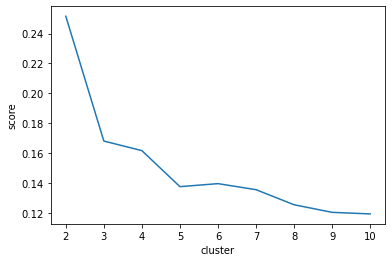

In [39]:
silhoutte_scores_by_k = {} 

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42).fit(X_train_final)
    labels = kmeans.predict(X_train_final)
    silhoutte_scores_by_k[k] = silhouette_score(X_train_final, labels)

#Elbow plot
plt.figure()
plt.plot(pd.DataFrame.from_dict(silhoutte_scores_by_k, orient = "index"))
plt.xlabel("cluster")
plt.ylabel("score")
plt.show()

In [40]:
#To find the optimal value for K I am going to use the Silhouette Score metric
#Silhouette score is a more precise approach than inertia which can be hard to interpret and will go down as K increases.
#The best value for K shown by Silhouette score is 2

### Interpret Clusters

In [41]:
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_train_final)

X_train_final['clusters'] = kmeans.predict(X_train_final) + 1
X_train_final.groupby("clusters").mean()
# e.g. add the clusters to a pandas dataframe ... average over features

,mean radius,mean texture,mean smoothness,mean compactness,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst smoothness,worst concavity,worst symmetry,worst fractal dimension
clusters,,,,,,,,,,,,,,,,,,,
1,-0.370572,-0.306655,-0.454815,-0.741018,-0.672970,-0.414652,-0.363424,-0.467557,-0.173660,-0.226975,-0.667254,-0.654466,-0.610206,-0.161102,-0.556104,-0.426047,-0.671157,-0.333990,-0.537477
2,0.443970,0.367394,0.544899,0.887790,0.806264,0.496781,0.435406,0.560165,0.208057,0.271931,0.799415,0.784095,0.731068,0.193011,0.666250,0.510433,0.804092,0.400143,0.643934


In [42]:
#We can see definitive trends in our clusters. It does appear that the similar samples are being grouped into the same clusters. 
#This is most likely our malignant and benign clusters.

## DBSCAN (3 points)

DBSCAN has two parameters, (1) epsilon or eps, which is the step length/window the algorithm uses to survey the data space and (2) the min number of points falling into the eps window to consider it as "cluster-like" or simply an unrelated grouping of data. Try a few different values. 

In [43]:
from sklearn.cluster import DBSCAN

In [44]:
dbscan = DBSCAN(eps = .05, min_samples = 5)
dbscan_clustering = X_train_final.copy(deep=True)
dbscan_clustering['cluster'] = dbscan.fit_predict(dbscan_clustering)+1

In [45]:
dbscan_clustering.groupby("cluster").mean()

,mean radius,mean texture,mean smoothness,mean compactness,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst smoothness,worst concavity,worst symmetry,worst fractal dimension,clusters
cluster,,,,,,,,,,,,,,,,,,,,
0,1.498435e-15,-1.670215e-15,-8.540177e-17,1.102903e-16,1.010181e-16,9.177030e-16,4.476029e-15,-2.049643e-17,-5.026504e-16,3.491712e-16,-2.991502e-16,-8.052167e-17,1.549432e-16,-1.808566e-15,-5.368111e-17,-1.545284e-15,-2.183845e-16,1.343858e-15,1.226369e-15,1.454945


In [46]:
dbscan2 = DBSCAN(eps = .25, min_samples = 50)
dbscan_clustering2 = X_train_final.copy(deep=True)
dbscan_clustering2['cluster'] = dbscan2.fit_predict(dbscan_clustering)+1

In [47]:
dbscan_clustering2.groupby("cluster").mean()

,mean radius,mean texture,mean smoothness,mean compactness,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst smoothness,worst concavity,worst symmetry,worst fractal dimension,clusters
cluster,,,,,,,,,,,,,,,,,,,,
0,1.498435e-15,-1.670215e-15,-8.540177e-17,1.102903e-16,1.010181e-16,9.177030e-16,4.476029e-15,-2.049643e-17,-5.026504e-16,3.491712e-16,-2.991502e-16,-8.052167e-17,1.549432e-16,-1.808566e-15,-5.368111e-17,-1.545284e-15,-2.183845e-16,1.343858e-15,1.226369e-15,1.454945


In [48]:
dbscan3 = DBSCAN(eps = 5, min_samples = 40)
dbscan_clustering3 = X_train_final.copy(deep=True)
dbscan_clustering3['cluster'] = dbscan3.fit_predict(dbscan_clustering)+1
dbscan_clustering3.groupby("cluster").mean()

,mean radius,mean texture,mean smoothness,mean compactness,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst smoothness,worst concavity,worst symmetry,worst fractal dimension,clusters
cluster,,,,,,,,,,,,,,,,,,,,
0,-1.537547,-0.122174,-2.118218,-2.229900,-1.860358,-0.526352,0.446143,0.147067,3.182216,-3.342875,-1.556666,-2.015422,-2.815227,1.829765,-1.274816,-3.100697,-1.822265,-2.142220,-1.261553,1.000000
1,0.003387,0.000269,0.004666,0.004912,0.004098,0.001159,-0.000983,-0.000324,-0.007009,0.007363,0.003429,0.004439,0.006201,-0.004030,0.002808,0.006830,0.004014,0.004719,0.002779,1.455947


In [49]:
dbscan4 = DBSCAN(eps = 6, min_samples = 40)
dbscan_clustering4 = X_train_final.copy(deep=True)
dbscan_clustering4['cluster'] = dbscan4.fit_predict(dbscan_clustering)+1
dbscan_clustering4.groupby("cluster").mean()

,mean radius,mean texture,mean smoothness,mean compactness,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst smoothness,worst concavity,worst symmetry,worst fractal dimension,clusters
cluster,,,,,,,,,,,,,,,,,,,,
1,1.498435e-15,-1.670215e-15,-8.540177e-17,1.102903e-16,1.010181e-16,9.177030e-16,4.476029e-15,-2.049643e-17,-5.026504e-16,3.491712e-16,-2.991502e-16,-8.052167e-17,1.549432e-16,-1.808566e-15,-5.368111e-17,-1.545284e-15,-2.183845e-16,1.343858e-15,1.226369e-15,1.454945


### Explain the Choice of Parameter Values

In [50]:
from sklearn.neighbors import NearestNeighbors
#I am using 40 neighbors as it is double the number of features
neighbors = NearestNeighbors(n_neighbors=40)
neighbors_fit = neighbors.fit(X_train_final)
distances, indices = neighbors_fit.kneighbors(X_train_final)

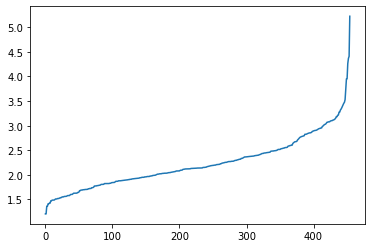

In [51]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

In [52]:
#min_samples was chosen through random selection of values but used double the number of features as a rule of thumb.
#min_samples should be tuned using domain knowledge. 

#I used K-Nearest neighbors to determine the optimal EPS value. 
#The technique comes from this paper (https://iopscience.iop.org/article/10.1088/1755-1315/31/1/012012/pdf)

### Is the Clustering Better or Equal to K-Means?

In [53]:
# Use a method of choice to answer--such as looking at the silhouette scores for the two approaches
from sklearn import metrics
labels = dbscan3.labels_
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X_train_final, labels))

Silhouette Coefficient: 0.358


In [54]:
#According to our comparison of Silhouette scores, our DBscan model performs better than our K-means model.

## Evaluate Clustering Relative to Ground Truth (2 Point)

Since the dataset has labels for the cancer vs. healthy samples, it is possible to get a sense of how well these approaches could diagnose cancer patients. First look at the training data used for clustering above. In the coming weeks, we will get into more performance metrics and will revisit this example to see if a supervised approach offers improvement. For now, I have provided a basic classification-metric called accuracy. It is **TP + TN / Total**, where TP = True Positive or (correct positive diagnoses) and TN = True Negative or (correct negative diagnoses). The total is just the number of predictions made.

In [55]:
## First, if K-means suggested > 2 clusters, refit with k=2 now. 
## We know that the ground truth should two groups/clusters--e.g. cancer vs. healthy or normal samples. 

## if necessary, do that below:
## k_means_2_clusters = 
kmeans_2_clusters = KMeans(n_clusters=2, random_state=42).fit(X_train_final)
## ...


### Examples of Computing Accuracy

In [56]:
# from scratch
y_pred = np.array([1,1,1,0,1,1])
y_true = np.array([1,1,0,0,1,1])

(y_true == y_pred).sum() / 6

0.8333333333333334

In [57]:
# sklearn
from sklearn.metrics import accuracy_score
accuracy_score(y_true, y_pred)

0.8333333333333334

### Compute Diagnostic Accuracy for K-Means

In [58]:
## Do for K-means


## Predict Train Set with k=2 model
## y_pred_train
y_pred_train = kmeans_2_clusters.predict(X_train_final)
## Predict Test Set with k=2 model
## y_pred_test
y_pred_test = kmeans_2_clusters.fit_predict(X_test)

In [59]:
pd.Series(y_pred_test).value_counts()


0    84
1    30
dtype: int64

In [60]:
#I inverse the predicted datasets as out K-means Clustering model swapped 0 and 1

In [61]:
from sklearn.metrics import accuracy_score
y_pred_train = list(map(lambda x: 0 if x == 1 else 1, y_pred_train))
accuracy_score(y_train, y_pred_train)

0.789010989010989

In [62]:
from sklearn.metrics import accuracy_score
y_pred_test = list(map(lambda x: 0 if x == 1 else 1, y_pred_test))
accuracy_score(y_test, y_pred_test)

0.8859649122807017

### Explain Result (e.g. Is there overfitting/underfitting?)

We dont know which of the classes is being evaluated but we will assume we have a test accuracy of 88%. There is a slight performance increase with the test set which is to be expected with smaller datasets with a smaller test size and class imbalance.

## Bonus

In [67]:
X_train_final = pd.DataFrame(X_train_data, columns = X_train_corr.columns)
X_train_final

,mean radius,mean texture,mean smoothness,mean compactness,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst smoothness,worst concavity,worst symmetry,worst fractal dimension
0,-1.916535,-0.352411,0.820044,0.901411,0.136915,1.118094,1.983966,-0.017888,0.200359,1.123419,2.056701,2.565466,2.440816,1.985442,1.978274,0.762864,2.504454,1.849870,1.674025
1,1.699088,1.593731,1.295858,2.210581,1.885634,1.874970,1.510829,1.234740,-0.892523,-1.208621,1.383987,0.583085,0.778561,-0.152135,1.036281,0.798725,1.642220,1.728193,1.938065
2,-1.834107,-1.385035,-1.416490,-0.143822,-0.700786,1.743645,1.089515,0.450050,1.718387,0.888110,1.081427,0.759919,0.768329,1.983744,1.220126,-1.536757,-0.592724,0.761014,0.288920
3,-1.086072,1.358717,0.127551,-0.536485,-0.965221,0.424666,0.272557,-0.600729,0.747452,0.337001,-1.089575,-1.049695,-1.012639,0.438363,-0.444916,0.830451,-0.796734,0.938374,0.066121
4,-1.311450,-1.055986,1.252881,-0.316012,-1.127971,2.602646,1.086260,0.893505,0.661388,0.465040,-1.013105,-1.306546,-0.564318,1.980673,1.261846,-0.113859,-1.598342,1.131296,-0.021413
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
450,-1.999134,-1.131270,0.218280,1.074422,-0.406312,0.442258,2.437032,0.929637,-0.626883,2.280373,2.113017,1.209776,1.053948,0.920097,2.390860,-0.424965,-0.566078,-1.199472,1.392528
451,-0.665790,-0.094536,1.301974,0.179660,-0.169913,0.072796,0.548204,-0.162640,0.998045,0.825533,0.143541,0.149109,0.520460,-0.624215,0.366049,1.540553,0.300554,-0.016340,0.638842
452,0.235167,-0.489969,-2.623821,-2.090191,-1.487341,-1.188348,-1.613082,-1.904386,-1.030009,-1.753425,-1.998300,-1.554744,-1.700038,-0.688704,-1.598574,-2.235559,-1.432553,-0.720811,-1.734573
453,0.143300,0.217211,0.780477,0.416479,0.716267,-0.458032,0.580903,-0.863326,-0.353832,-0.558613,-0.290797,-0.280000,-0.275325,-1.477686,-0.272833,1.267586,0.829881,0.608554,1.288682


In [69]:
X_test

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
204,12.47,18.60,81.09,481.9,0.09965,0.10580,0.08005,0.03821,0.1925,0.06373,...,14.97,24.64,96.05,677.9,0.1426,0.2378,0.2671,0.10150,0.3014,0.08750
70,18.94,21.31,123.60,1130.0,0.09009,0.10290,0.10800,0.07951,0.1582,0.05461,...,24.86,26.58,165.90,1866.0,0.1193,0.2336,0.2687,0.17890,0.2551,0.06589
131,15.46,19.48,101.70,748.9,0.10920,0.12230,0.14660,0.08087,0.1931,0.05796,...,19.26,26.00,124.90,1156.0,0.1546,0.2394,0.3791,0.15140,0.2837,0.08019
431,12.40,17.68,81.47,467.8,0.10540,0.13160,0.07741,0.02799,0.1811,0.07102,...,12.88,22.91,89.61,515.8,0.1450,0.2629,0.2403,0.07370,0.2556,0.09359
540,11.54,14.44,74.65,402.9,0.09984,0.11200,0.06737,0.02594,0.1818,0.06782,...,12.26,19.68,78.78,457.8,0.1345,0.2118,0.1797,0.06918,0.2329,0.08134
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
486,14.64,16.85,94.21,666.0,0.08641,0.06698,0.05192,0.02791,0.1409,0.05355,...,16.46,25.44,106.00,831.0,0.1142,0.2070,0.2437,0.07828,0.2455,0.06596
75,16.07,19.65,104.10,817.7,0.09168,0.08424,0.09769,0.06638,0.1798,0.05391,...,19.77,24.56,128.80,1223.0,0.1500,0.2045,0.2829,0.15200,0.2650,0.06387
249,11.52,14.93,73.87,406.3,0.10130,0.07808,0.04328,0.02929,0.1883,0.06168,...,12.65,21.19,80.88,491.8,0.1389,0.1582,0.1804,0.09608,0.2664,0.07809
238,14.22,27.85,92.55,623.9,0.08223,0.10390,0.11030,0.04408,0.1342,0.06129,...,15.75,40.54,102.50,764.0,0.1081,0.2426,0.3064,0.08219,0.1890,0.07796


In [71]:
### Bonus (1 point): Compute Diagnostic Accuracy for DBSCAN (see book chapter 9 for an example on approaching this)

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

dbs = DBSCAN(eps = 3, min_samples=3)
dbs.fit(X_train_final)
knn.fit(dbs.components_, dbs.labels_[dbs.core_sample_indices_])

y_pred_test = knn.predict(X_test_final)
test_acc_score = accuracy_score(y_test,y_pred_test)
print("Test Set Accuracy = {}".format(test_acc_score))

Test Set Accuracy = 0.37719298245614036


# DBScan model evaluates most cases as falling into 1 cluster. 

In [73]:
### Bonus (1 point) Perform the clustering, K-means and DBSCAN, on PCA transformed data
## Does using the PCA transformed data matrix improve clustering and prediction of cancer on the test set?
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

proc_pipe_pca = Pipeline(steps = [("yeo_johnson", PowerTransformer(method='yeo-johnson')), 
                              ('scale', StandardScaler()),
                              ('pca', PCA(n_components=6))])

X_train_final = proc_pipe_pca.fit_transform(X_train)
X_test_final = proc_pipe_pca.transform(X_test)


k_means_model_pca = KMeans(n_clusters=2, random_state=1).fit(X_train_final)
y_pred_train_pca = k_means_model_pca.predict(X_train_final)
train_acc_score = accuracy_score(y_train,y_pred_train_pca)

print("Kmeans Training Set Accuracy = {}".format(train_acc_score))
y_pred_test_pca = k_means_model_pca.predict(X_test_final)
train_acc_score = accuracy_score(y_test, y_pred_test_pca)
print("Kmeans Testing Set Accuracy = {}".format(train_acc_score))

knn_pca = KNeighborsClassifier()

dbs_pca = DBSCAN(eps = 3, min_samples=5)
dbs_pca.fit(X_train_final)
knn_pca.fit(dbs_pca.components_,dbs_pca.labels_[dbs_pca.core_sample_indices_])

y_pred_test_dbs = knn_pca.predict(X_test_final)
train_acc_score = accuracy_score(y_test,y_pred_test_dbs)

print("DBSCAN Testing Set Accuracy = {}".format(train_acc_score))



Kmeans Training Set Accuracy = 0.9054945054945055
Kmeans Testing Set Accuracy = 0.956140350877193
DBSCAN Testing Set Accuracy = 0.37719298245614036


PCA did not improve our predictions but the result not changing does show the data has lots of redundancy.